In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### NOTES

#### UNSTACK

In [7]:
# Hard to make comparisons
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27179
      actress     15544
1920  actor       48148
      actress     23691
1930  actor      150759
      actress     49485
1940  actor      161765
      actress     51338
1950  actor      157065
      actress     57089
1960  actor      133276
      actress     56698
1970  actor      151627
      actress     65764
1980  actor      195916
      actress     90164
1990  actor      261922
      actress    123764
2000  actor      488141
      actress    262315
2010  actor      730769
      actress    409910
2020  actor          48
      actress        27
2110  actor           2
      actress         1
dtype: int64

In [15]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
uns = c.groupby(['character', c.year // 10 * 10]).size()
uns

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [31]:
# Argument to unstack is the column it is using, default is index 1
# fillna to change NaN
u = uns.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [32]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

### END NOTES

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [40]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()


character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [44]:
d = c.Superman - c.Batman
print('Superman Years: ')
print(len(d[d > 0.0]))

Superman Years: 
12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [42]:
d = c.Superman - c.Batman
print('Superman Years: ')
print(len(d[d < 0.0]))

Superman Years: 
26


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

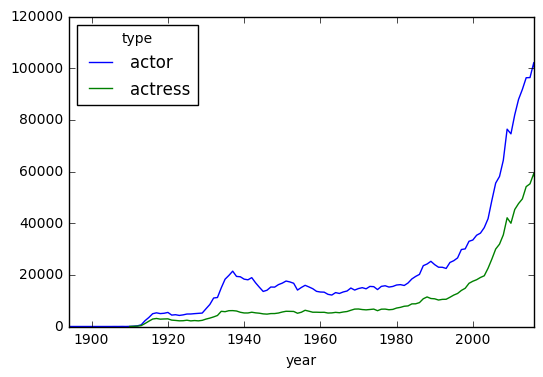

In [53]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(xlim=(1894, 2016))

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

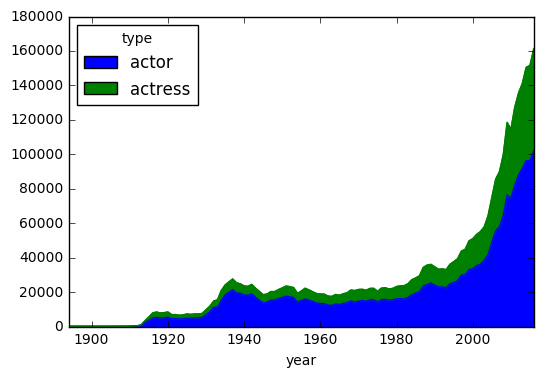

In [54]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area',xlim=(1894, 2016))

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

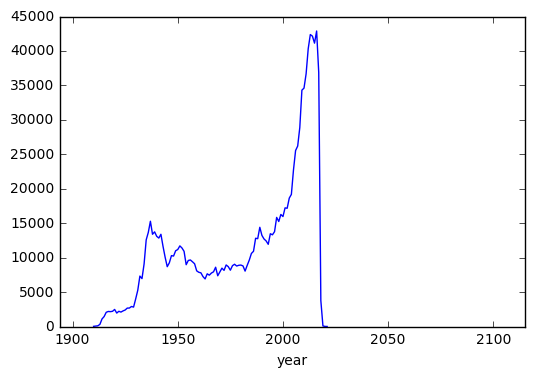

In [60]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

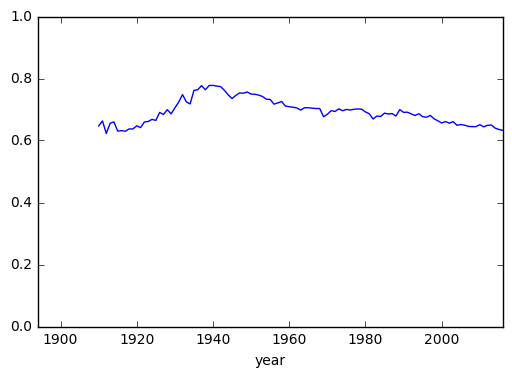

In [68]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(xlim=[1894,2016],ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

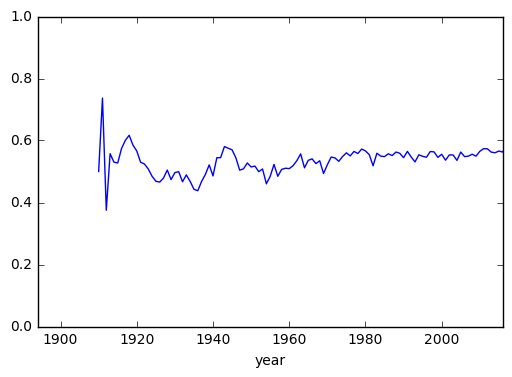

In [69]:
c = cast[cast.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(xlim=[1894,2016],ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

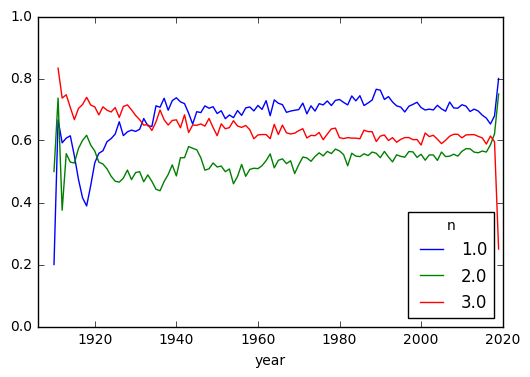

In [74]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])